In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
dfConsolidados = pd.read_csv( "consolidado_estaciones.csv", parse_dates={'Fecha':['Año', 'Mes', 'Dia']} )
dfConsolidados = dfConsolidados.drop(["Hora", "Minuto", "Segundo"], axis=1)

dfConsolidados = dfConsolidados.sort_values(by="Fecha").reset_index().drop("index", axis=1)

dfConsolidados

,Fecha,pm25,calidad_pm25,calidad,ESTACIÓN,LATITUD,LONGITUD,TIPO DE ESTACIÓN
0,2015-01-31,45,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
1,2015-01-31,31,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
2,2015-01-31,50,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
3,2015-01-31,45,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
4,2015-01-31,48,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
...,...,...,...,...,...,...,...,...
349349,2022-04-30,238.105,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349350,2022-04-30,213.295,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349351,2022-04-30,188.082,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349352,2022-04-30,222.722,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional


In [5]:
fechas = dfConsolidados["Fecha"].unique()
estaciones = dfConsolidados["ESTACIÓN"].unique()

def ToFloat(df):
  if df.count('.') >= 2:
    return float( df[:-4] )
  else:
    return float( df.replace(',', '.') )

def DayOfWeek(df):
  return df.strftime('%A')

In [6]:
dfConsolidados["pm25"] = dfConsolidados["pm25"].apply(ToFloat)
dfConsolidados

,Fecha,pm25,calidad_pm25,calidad,ESTACIÓN,LATITUD,LONGITUD,TIPO DE ESTACIÓN
0,2015-01-31,45.000,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
1,2015-01-31,31.000,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
2,2015-01-31,50.000,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
3,2015-01-31,45.000,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
4,2015-01-31,48.000,1,1,Estación #12 - Estación Tráfico Centro,62.525.611,-755.695.801,Tráfico o Industrial
...,...,...,...,...,...,...,...,...
349349,2022-04-30,238.105,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349350,2022-04-30,213.295,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349351,2022-04-30,188.082,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional
349352,2022-04-30,222.722,1,1,"Estación #85 - Medellín, San Cristobal - Parqu...",62.778.502,-756.364.288,Representatividad Poblacional


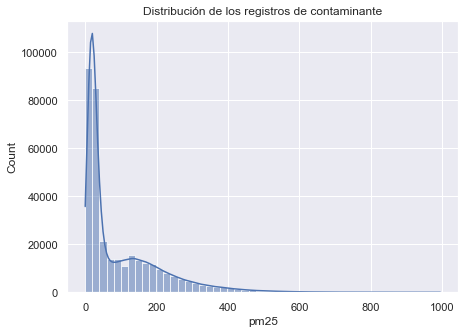

In [8]:
sns.set_theme(style="dark")

sns.histplot(data=dfConsolidados, x="pm25", bins=50, kde=True)
sns.set(rc={'figure.figsize':(7,5)}); plt.grid()

plt.title("Distribución de los registros de contaminante"); plt.show()

In [9]:
# obtener el dia de la semana para cada fecha
dfConsolidados['Fecha'].apply(DayOfWeek)

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
349349    Saturday
349350    Saturday
349351    Saturday
349352    Saturday
349353    Saturday
Name: Fecha, Length: 349354, dtype: object

In [10]:
estaciones

array(['Estación #12 - Estación Tráfico Centro',
       'Estación #44 - Medellín, El Poblado - Tanques La Ye EPM',
       'Estación #79 - Medellín, Altavista - I.E. Pedro Octavio Amado',
       'Estación #80 - Medellín, Villahermosa - Planta de producción de agua potable EPM',
       'Estación #83 - Medellin, Belén - I.E Pedro Justo Berrio',
       'Estación #84 - Medellín, El Poblado - I.E INEM sede Santa Catalina',
       'Estación #85 - Medellín, San Cristobal - Parque Biblioteca Fernando Botero',
       'Estación #86 - Medellín, Aranjuez - I.E Ciro Mendia'],
      dtype=object)

In [11]:
testStations = []; promediosPm25 = []; dateList = []

for fecha in fechas:
  for estacion in estaciones:
    promediosPm25.append( np.mean( dfConsolidados[ (dfConsolidados["Fecha"] == fecha) & (dfConsolidados["ESTACIÓN"] == estacion) ]["pm25"] ) )
  dateList += len(estaciones)*[fecha]
  testStations += list( estaciones )

averageData = {"Fecha":dateList, "PromedioPM25":promediosPm25, "ESTACIÓN":testStations}

In [12]:
averageDataDf = pd.DataFrame(averageData)
averageDataDf

,Fecha,PromedioPM25,ESTACIÓN
0,2015-01-31,43.583333,Estación #12 - Estación Tráfico Centro
1,2015-01-31,NaN,"Estación #44 - Medellín, El Poblado - Tanques ..."
2,2015-01-31,NaN,"Estación #79 - Medellín, Altavista - I.E. Pedr..."
3,2015-01-31,NaN,"Estación #80 - Medellín, Villahermosa - Planta..."
4,2015-01-31,NaN,"Estación #83 - Medellin, Belén - I.E Pedro Jus..."
...,...,...,...
20987,2022-04-30,16.529167,"Estación #80 - Medellín, Villahermosa - Planta..."
20988,2022-04-30,238.285526,"Estación #83 - Medellin, Belén - I.E Pedro Jus..."
20989,2022-04-30,148.190667,"Estación #84 - Medellín, El Poblado - I.E INEM..."
20990,2022-04-30,173.209458,"Estación #85 - Medellín, San Cristobal - Parqu..."


Se corrigen los valores `NaN` y se agrega la columna de los nombres de los días respectivos:

In [13]:
averageDataDf.insert(1, "Dia_Semana", np.array( averageDataDf["Fecha"].apply(DayOfWeek) ) )
averageDataDf["PromedioPM25"] = averageDataDf["PromedioPM25"].fillna(0)
averageDataDf

,Fecha,Dia_Semana,PromedioPM25,ESTACIÓN
0,2015-01-31,Saturday,43.583333,Estación #12 - Estación Tráfico Centro
1,2015-01-31,Saturday,0.000000,"Estación #44 - Medellín, El Poblado - Tanques ..."
2,2015-01-31,Saturday,0.000000,"Estación #79 - Medellín, Altavista - I.E. Pedr..."
3,2015-01-31,Saturday,0.000000,"Estación #80 - Medellín, Villahermosa - Planta..."
4,2015-01-31,Saturday,0.000000,"Estación #83 - Medellin, Belén - I.E Pedro Jus..."
...,...,...,...,...
20987,2022-04-30,Saturday,16.529167,"Estación #80 - Medellín, Villahermosa - Planta..."
20988,2022-04-30,Saturday,238.285526,"Estación #83 - Medellin, Belén - I.E Pedro Jus..."
20989,2022-04-30,Saturday,148.190667,"Estación #84 - Medellín, El Poblado - I.E INEM..."
20990,2022-04-30,Saturday,173.209458,"Estación #85 - Medellín, San Cristobal - Parqu..."


## **Cantidad de emisiones por día**

A continuación se tienen las acumulaciones de emisiones separadas por día independiente de la estación donde fueron registradas:

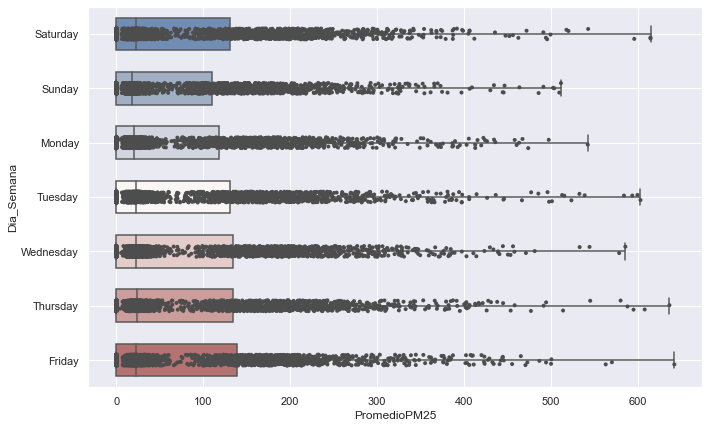

In [19]:
sns.set_theme(style="dark")

sns.boxplot(x="PromedioPM25", y="Dia_Semana", data=averageDataDf,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="PromedioPM25", y="Dia_Semana", data=averageDataDf,
              size=4, color=".3", linewidth=0)

sns.set(rc={'figure.figsize':(12, 7)}); plt.grid(); plt.show()

# para guardar el plot
#plt.savefig('promedioEmisionesDia.png', dpi=300)

## **Cantidad de emisiones por estación**

Se tienen los contaminantes separados por cada estación donde fueron registrados, independiente del día

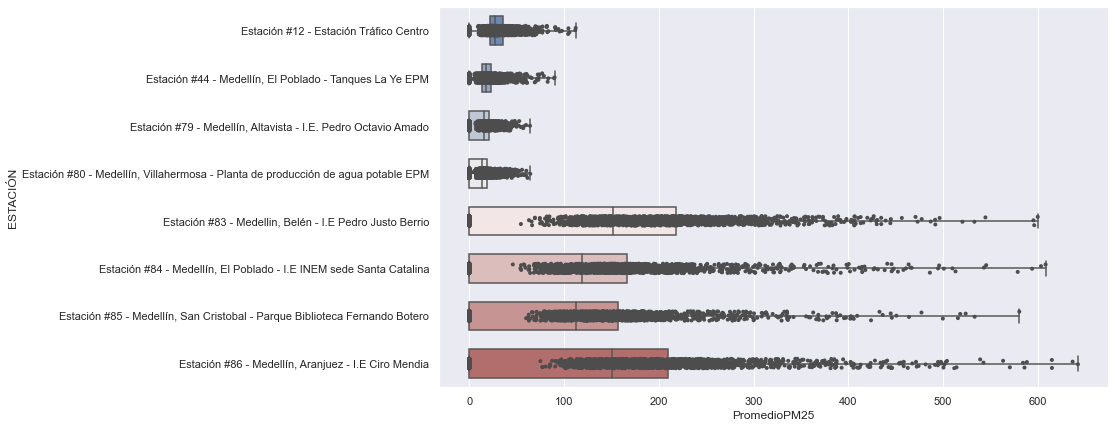

In [20]:
sns.boxplot(x="PromedioPM25", y="ESTACIÓN", data=averageDataDf,
            whis=[0, 100], width=.6, palette="vlag")

sns.stripplot(x="PromedioPM25", y="ESTACIÓN", data=averageDataDf,
              size=4, color=".3", linewidth=0)

sns.set(rc={'figure.figsize':(11.7,8.27)})

# para guardar el plot
#plt.savefig('promedioEmisionesEstaciones.png', bbox_inches="tight", dpi=300)

## **Distribución de frecuencias del contaminante**

Para visualizar las acumulaciones en los registros del contaminante PM25 se tiene el siguiente gráfico, se ha tomado para promedios del contaminante que sean mínimo de 60PM. Para encontrar las distribuciones que más pueden ajustarse al comportamiento de dicha variable, se ha importado la librería `fitter` que dará como resultado aquellas distribuciones que mejor se ajusten a partir del cálculo del error cuadrático medio.

Inicialmente, veamos el histograma de frecuencias:

In [38]:
from fitter import Fitter, get_common_distributions, get_distributions

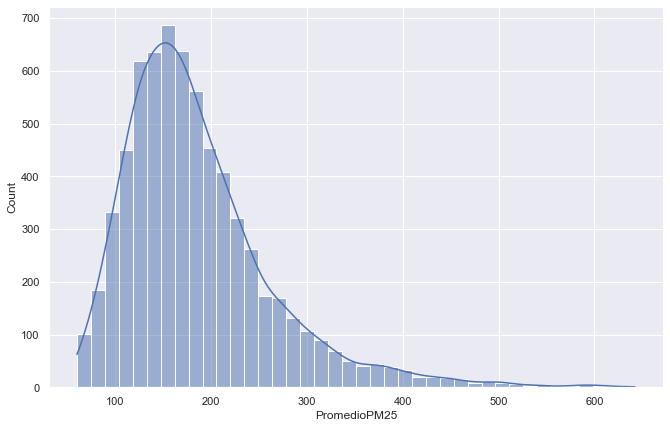

In [45]:
sns.set_theme(style="dark")

sns.histplot(data=averageDataDf[averageDataDf["PromedioPM25"] >= 60], x="PromedioPM25", bins=40, kde=True)
sns.set(rc={'figure.figsize':(7,5)}); plt.grid(); plt.show()

Ahora, veamos las distribuciones que mejor se ajustan, tomando como referencia algunas de ellas:

,sumsquare_error,aic,bic,kl_div
f,0.000006,1561.875690,-140440.762835,inf
lognorm,0.000007,1567.852400,-139176.124382,inf
chi2,0.000012,1605.850718,-135264.198560,inf
gamma,0.000012,1605.850344,-135264.178802,inf
beta,0.000013,1603.061630,-134962.738544,inf


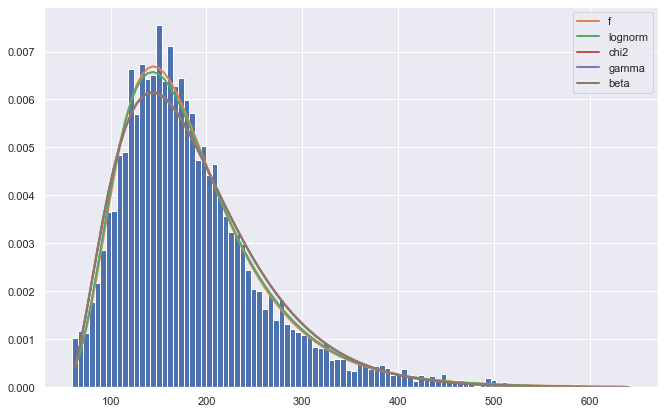

In [51]:
f = Fitter(averageDataDf[averageDataDf["PromedioPM25"] >= 60]["PromedioPM25"],
           distributions=['gamma',
                          'lognorm',
                          't',
                          'f',
                          "beta",
                          "chi2",
                          "norm"])

sns.set(rc={'figure.figsize':(11,7)}); plt.grid()
f.fit(); f.summary()

Veamos los parámetros para una distribución:

In [57]:
# para el fit de la distribucion f, se necesitan los grados de libertad
f.fitted_param['f']

(52.35620046688912, 19.083421898205692, -1.245956807074081, 167.48253233416952)

## **Mapa de calor, día y estación para contaminantes**

Para analizar de una mejor manera la relación de cada estación con los contaminantes que se registran por semana se puede hacer uso de un **mapa de calor**. Para ello estructuramos primero los datos de tal forma que se calculen los promedios de contaminante pm2.5 por cada día de la semana para cada estación, tomando de referencia los datos de emisiones por día:

In [23]:
avrDayStationPM25 = averageDataDf[["PromedioPM25", "Dia_Semana", "ESTACIÓN"]]
promediosPm25Dia = []; dayList = []; stationList = []

for dia in np.array( avrDayStationPM25["Dia_Semana"].unique() ):
    for estacion in np.array( avrDayStationPM25["ESTACIÓN"].unique() ):
        promediosPm25Dia.append( np.mean( np.array(avrDayStationPM25[ (avrDayStationPM25["Dia_Semana"] == dia) & (avrDayStationPM25["ESTACIÓN"] == estacion) ]["PromedioPM25"]) ) )
    dayList += len( avrDayStationPM25["ESTACIÓN"].unique() )*[dia]
    stationList += list( avrDayStationPM25["ESTACIÓN"].unique() )

avrDayStationPM25 = {"PromedioPM25":promediosPm25Dia, "Dia_Semana":dayList, "ESTACIÓN":stationList}
avrDayStationPM25 = pd.DataFrame(avrDayStationPM25)

# visualizando los 5 primeros valores
avrDayStationPM25.head()

,PromedioPM25,Dia_Semana,ESTACIÓN
0,30.424167,Saturday,Estación #12 - Estación Tráfico Centro
1,18.832522,Saturday,"Estación #44 - Medellín, El Poblado - Tanques ..."
2,13.566263,Saturday,"Estación #79 - Medellín, Altavista - I.E. Pedr..."
3,12.159755,Saturday,"Estación #80 - Medellín, Villahermosa - Planta..."
4,134.739189,Saturday,"Estación #83 - Medellin, Belén - I.E Pedro Jus..."


Sabiendo el nombre de cada estación, podemos acortar sus nombres únicamente a sus números dados:

In [24]:
def GetStationNumber(df):
    return df[:df.find(" -")]

avrDayStationPM25["ESTACIÓN"] = avrDayStationPM25["ESTACIÓN"].apply(GetStationNumber)

# visualizando los 5 primeros valores
avrDayStationPM25.head()

,PromedioPM25,Dia_Semana,ESTACIÓN
0,30.424167,Saturday,Estación #12
1,18.832522,Saturday,Estación #44
2,13.566263,Saturday,Estación #79
3,12.159755,Saturday,Estación #80
4,134.739189,Saturday,Estación #83


Reorganizando los datos y representándolos en el mapa de calor, se tiene:

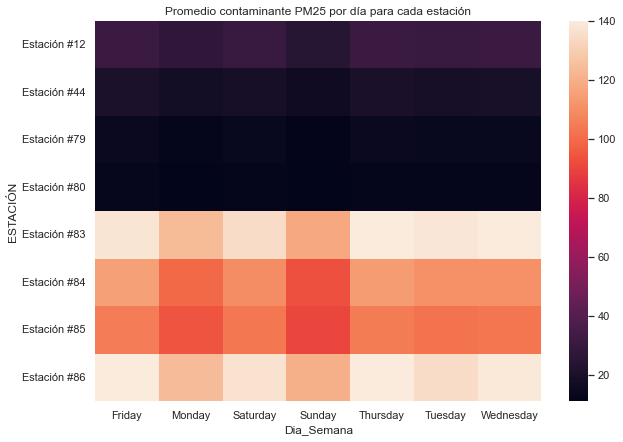

In [34]:
PM25_Pivot = avrDayStationPM25.pivot("ESTACIÓN", "Dia_Semana", "PromedioPM25")

sns.set(rc={'figure.figsize':(10,7)})
sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(PM25_Pivot)
plt.title("Promedio contaminante PM25 por día para cada estación"); plt.show()

In [31]:
estaciones

array(['Estación #12 - Estación Tráfico Centro',
       'Estación #44 - Medellín, El Poblado - Tanques La Ye EPM',
       'Estación #79 - Medellín, Altavista - I.E. Pedro Octavio Amado',
       'Estación #80 - Medellín, Villahermosa - Planta de producción de agua potable EPM',
       'Estación #83 - Medellin, Belén - I.E Pedro Justo Berrio',
       'Estación #84 - Medellín, El Poblado - I.E INEM sede Santa Catalina',
       'Estación #85 - Medellín, San Cristobal - Parque Biblioteca Fernando Botero',
       'Estación #86 - Medellín, Aranjuez - I.E Ciro Mendia'],
      dtype=object)

- Código para realizar un multiple-plot que relaciona los días con las estaciones en una grilla de histogramas

```
sns.set_theme(style="white")

grid_Dias_Estaciones = sns.FacetGrid(averageDataDf,
                                     col = "Dia_Semana",
                                     row = "ESTACIÓN",
                                     sharex = True,
                                     margin_titles = False)

grid_Dias_Estaciones.map(sns.histplot, "PromedioPM25", bins=50)

plt.subplots_adjust(hspace=0.3, wspace=0.3); plt.show()
#grid_Dias_Estaciones.add_legend()
```

## **Intento de histograma de frecuencias bivariado**

In [11]:
dfConsolidados.insert( 1, "Dia_Semana", np.array(dfConsolidados["Fecha"].apply(DayOfWeek)) )

In [20]:
dfConsolidados["ESTACIÓN"] = dfConsolidados["ESTACIÓN"].apply(GetStationNumber)
dfConsolidados

,Fecha,Dia_Semana,pm25,calidad_pm25,calidad,ESTACIÓN,LATITUD,LONGITUD,TIPO DE ESTACIÓN
0,2015-01-31,Saturday,45.000,1,1,Estación #12,62.525.611,-755.695.801,Tráfico o Industrial
1,2015-01-31,Saturday,31.000,1,1,Estación #12,62.525.611,-755.695.801,Tráfico o Industrial
2,2015-01-31,Saturday,50.000,1,1,Estación #12,62.525.611,-755.695.801,Tráfico o Industrial
3,2015-01-31,Saturday,45.000,1,1,Estación #12,62.525.611,-755.695.801,Tráfico o Industrial
4,2015-01-31,Saturday,48.000,1,1,Estación #12,62.525.611,-755.695.801,Tráfico o Industrial
...,...,...,...,...,...,...,...,...,...
349349,2022-04-30,Saturday,238.105,1,1,Estación #85,62.778.502,-756.364.288,Representatividad Poblacional
349350,2022-04-30,Saturday,213.295,1,1,Estación #85,62.778.502,-756.364.288,Representatividad Poblacional
349351,2022-04-30,Saturday,188.082,1,1,Estación #85,62.778.502,-756.364.288,Representatividad Poblacional
349352,2022-04-30,Saturday,222.722,1,1,Estación #85,62.778.502,-756.364.288,Representatividad Poblacional


<AxesSubplot:xlabel='Dia_Semana', ylabel='Count'>

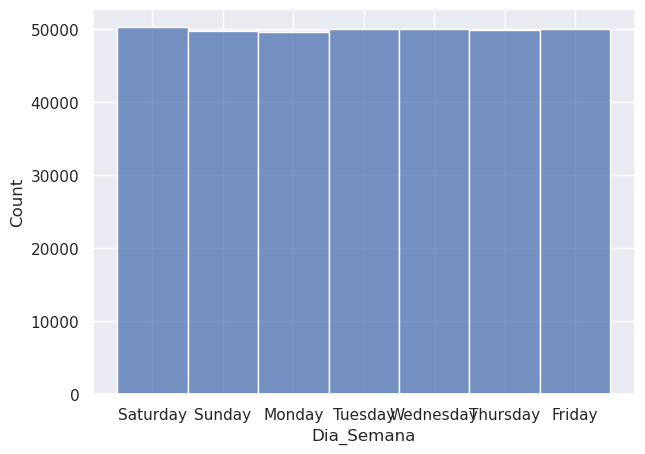

In [30]:
sns.histplot(dfConsolidados, x="Dia_Semana", bins=40)

In [25]:
type(dfConsolidados["pm25"])

pandas.core.series.Series